In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir /content/drive/MyDrive/YOLOv4
!mkdir /content/drive/MyDrive/YOLOv4/backup
#!mkdir /content/drive/MyDrive/YOLOv4/backup_lite 

mkdir: cannot create directory ‘/content/drive/MyDrive/YOLOv4’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/YOLOv4/backup’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/YOLOv4/backup_lite’: File exists


In [ ]:
!mkdir /content/darknet

!unzip "/content/drive/MyDrive/Yoloclothes_darknet.zip" -d "/content/darknet"

In [ ]:

%cd /content/darknet

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1' Makefile

!make
!chmod +x ./darknet

/content/darknet
sed: -e expression #1, char 17: unterminated `s' command
mkdir -p ./obj/
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisle

In [ ]:
!rm -rf /content/darknet/backup
!ln -s /content/drive/'MyDrive'/YOLOv4/backup/content/darknet




!sudo apt install dos2unix

!dos2unix ./data/list/train.txt  ####class 31개
!dos2unix ./data/list/validation.txt
!dos2unix ./data/list/test.txt
!dos2unix ./data/clothesdef.names
!dos2unix ./data/clothes.data
!dos2unix ./cfg/yolov4-custom.cfg

#!dos2unix ./data/list/train_lite.txt   ####class 25개
#!dos2unix ./data/list/validation_lite.txt
#!dos2unix ./data/list/test_lite.txt
#!dos2unix ./data/clothesdef_lite.names
#!dos2unix ./data/clothes_lite.data
#!dos2unix ./cfg/yolov4-custom_lite.cfg

In [ ]:
def imShow(path): 
  import cv2 
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd /content/darknet

#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4.conv.137  # 처음 학습을 시작할 때 pretrain된 모델을 가져온다.

In [ ]:
#import torch
#import torch.nn as nn
#torch.cuda.empty_cache()   #용량 확보를 위해 cache 비우기

In [ ]:
%cd /content/darknet

##!time ./darknet detector train data/clothes_lite.data cfg/yolov4-custom_lite.cfg /content/drive/MyDrive/YOLOv4/backup_lite/yolov4-custom_lite_last.weights  -dont_show  -map
##!cp -r /content/drive/MyDrive/YOLOv4/backup_lite/

!time ./darknet detector train data/clothes.data cfg/yolov4-custom.cfg /content/drive/MyDrive/YOLOv4/backup/yolov4-custom_last.weights  -dont_show  -map
!cp -r /content/drive/MyDrive/YOLOv4/backup/



 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

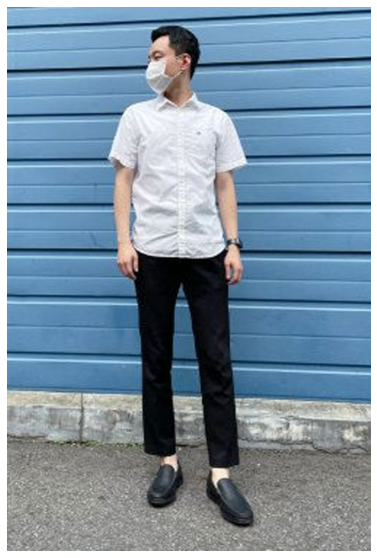

In [ ]:
!./darknet detector test data/clothes.data cfg/yolov4-custom.cfg /content/drive/MyDrive/YOLOv4/backup/yolov4-custom_last.weights  test/ -dont_show # 테스트 파일 경로 입력
imShow('predictions.jpg')

# 새 섹션